In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_california_housing

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import rbf_kernel

#Pipeline
from sklearn.pipeline import Pipeline, make_pipeline


#Classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


#Regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

#scores
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

## Functions

In [ ]:
def plot_decision_function(x0, x1, classifier, axes):
    x_pts = np.linspace(axes[0],axes[1],100)
    y_pts = np.linspace(axes[2],axes[3],100)
    xs,ys = np.meshgrid(x_pts,y_pts)
    grid = np.c_[xs.ravel(), ys.ravel()]
    pred = classifier.predict(grid).reshape(xs.shape)
    plt.clf()
    plt.plot(x0[:,0], x0[:,1], 'm.')
    plt.plot(x1[:,0], x1[:,1], 'g.')
    plt.contourf(xs, ys, pred,cmap=plt.cm.brg, alpha=0.2)
    plt.xlabel("$X_1$")
    plt.ylabel(fr"$X_2$")
    plt.grid()

## Linear Classification

In [ ]:
iris = load_iris(as_frame=False)

In [ ]:
X = iris.data[:,[2,3]]
y = iris.target

In [ ]:
setosa_or_versicolor = (y==1)|(y==2)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
C=5
alpha=0.05

In [ ]:
linear_svm = LinearSVC(C=C, loss="hinge", dual=True)
linear_svm.fit(X_scaled,y)

In [ ]:
svc_clf = SVC(kernel="linear", C=C)
svc_clf.fit(X_scaled,y)

In [ ]:
sgd_clf = SGDClassifier(alpha=alpha)
sgd_clf.fit(X_scaled,y)

In [ ]:
sgd_clf.intercept_

In [ ]:
def get_lines(model):
    

In [ ]:
X_new = [[5.3, 1.7]]

In [ ]:
linear_svm.decision_function(X_new)

In [ ]:
svc_clf.decision_function(X_new)

In [ ]:
X_class0 = X[(y==1)]
X_class1 = X[(y==2)]

In [ ]:
plot_decision_function(X_class0, X_class1, sgd_clf, [0,7,0,2.6])

## Non-Linear Classification

### Polynomial Features

In [ ]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [ ]:
svm_clf2 = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, max_iter=10000, random_state=42))

In [ ]:
svm_clf2.fit(X,y)

In [ ]:
x_0 = X[(y==0)]
x_1 = X[(y==1)]

In [ ]:
plot_decision_function(x_0, x_1, svm_clf2, [-1.50,2.75,-0.75,1.5])
plt.show()

In [ ]:
ker_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, C=10, coef0=10))
ker_clf.fit(X,y)

In [ ]:
plot_decision_function(x_0, x_1, ker_clf, [-1.50,2.75,-0.75,1.5])
plt.show()

### Similarity Features

In [ ]:
sim_feature = np.linspace(X[:,0].min(), X[:,0].max(), 300).reshape(-1,1)
simil1 = rbf_kernel(sim_feature, [[-0.5]], gamma=0.5)
simil2 = rbf_kernel(sim_feature, [[1]], gamma=0.5)

In [ ]:
plt.clf()
plt.plot(sim_feature, simil1, 'r--')
plt.plot(sim_feature, simil2, 'g--')
plt.show()

In [ ]:
sim_feature = np.linspace(X[:,0].min(), X[:,0].max(), 9).reshape(-1,1)
simil1 = rbf_kernel(sim_feature, [[-0.5]], gamma=0.5)
simil2 = rbf_kernel(sim_feature, [[1]], gamma=0.5)

In [ ]:
plt.clf()
plt.plot(simil1, simil2, 'bs')
plt.show()

This could make data separable, but randomsearch must be used to find 2 optimal landmarks

In [ ]:
rbf_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=1))
rbf_clf.fit(X, y)

In [ ]:
plot_decision_function(x_0, x_1, rbf_clf, [-1.5,2.5,-0.75, 1.50])
plt.show()

## SVM Regression

### Linear Regression

In [ ]:
X = np.random.randn(50,1)
y = 4 + X*2.5 + 2*np.random.randn(50,1)

In [ ]:
plt.clf()
plt.plot(X, y, 'bs')
plt.show()

In [ ]:
linear_svr = make_pipeline(StandardScaler(), LinearSVR(epsilon=2, random_state=42))

In [ ]:
linear_svr.fit(X,y.ravel())

In [ ]:
plt.clf()
plt.plot(X,y, 'bs')
plt.plot(X, linear_svr.predict(X) + linear_svr[-1].epsilon, 'r-', label='upper boundary')
plt.plot(X, linear_svr.predict(X), 'g-', label="prediction")
plt.plot(X, linear_svr.predict(X) - linear_svr[-1].epsilon, 'r-', label='lower boundary')
plt.legend()
plt.grid()
plt.show()

### Non-linear regression

In [ ]:
np.random.seed = 42
X = np.random.randn(50,1)
y = 4 + X**2 + X*2.5 + 2*np.random.randn(50,1)

In [ ]:
svr = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=100, epsilon=1))
svr.fit(X,y.ravel())

In [ ]:
new_x = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

In [ ]:
plt.clf()
plt.plot(X,y, 'bs')
plt.plot(new_x, svr.predict(new_x) + svr[-1].epsilon, 'r-', label='upper boundary')
plt.plot(new_x, svr.predict(new_x), 'g-', label="prediction")
plt.plot(new_x, svr.predict(new_x) - svr[-1].epsilon, 'r-', label='lower boundary')
plt.axis([-2,2,0,10])
plt.legend()
plt.grid()
plt.show()

## Exercises
### Linearly separable data

In [61]:
wine = load_wine(as_frame=True)

In [62]:
from pandas.plotting import scatter_matrix

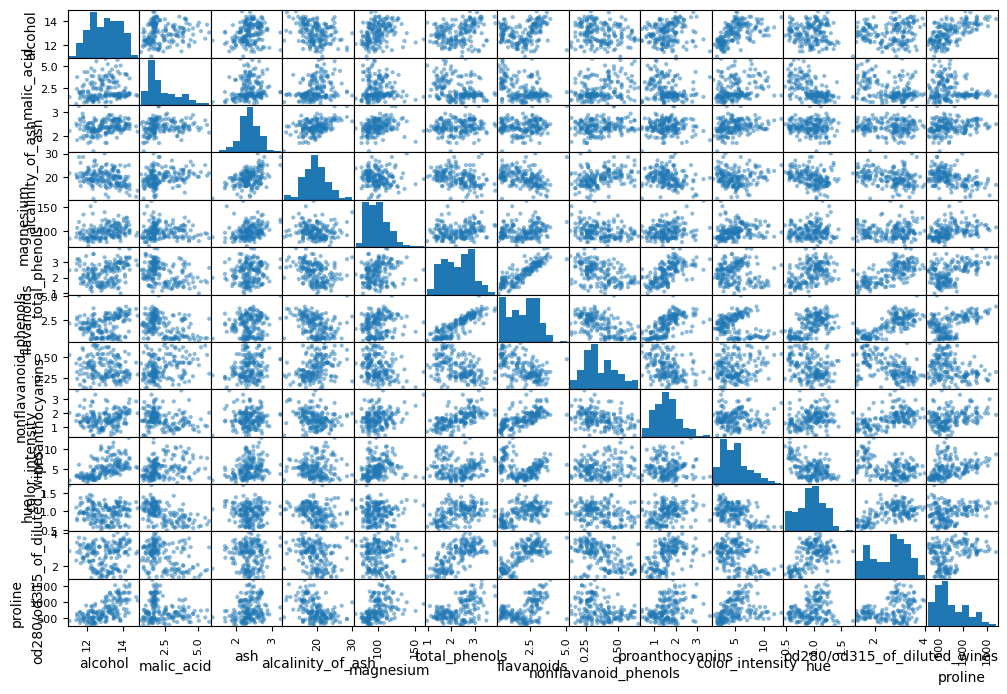

In [66]:
scatter_matrix(wine.data, figsize=(12,8))
plt.show()

In [67]:
X = wine.data.to_numpy()
y = wine.target.to_numpy()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
X_train.shape

(142, 13)

In [70]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_train)

In [85]:
svc_clf = SVC(kernel="linear", C=0.1, random_state=42)
svc_clf.fit(X_scaled, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [72]:
y_train[1]

0

In [73]:
first_wine_score = svc_clf.decision_function(X_scaled[1].reshape(1,-1))

In [74]:
first_wine_score

array([[ 2.20118683,  1.07057146, -0.21390305]])

In [86]:
cross_val_score(svc_clf, X_scaled, y_train, cv=3)

array([1.       , 1.       , 0.9787234])

In [79]:
param_grid = {"C":[0.01, 0.1, 1, 10], "kernel":["linear", "poly", "rbf"]}

In [81]:
grid_search = GridSearchCV(svc_clf, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_root_mean_squared_error')

In [82]:
grid_search.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [83]:
cv_res = pd.DataFrame(grid_search.cv_results_)

In [87]:
cv_res.head(9)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001489,0.000375,0.000569,1.166402e-04,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",-0.204124,-0.145865,-0.145865,-0.165285,0.027464,4
1,0.001393,0.000020,0.000602,7.462904e-05,0.01,poly,"{'C': 0.01, 'kernel': 'poly'}",-0.777282,-0.771845,-0.771845,-0.773657,0.002563,11
2,0.000955,0.000252,0.000404,4.092520e-05,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",-0.777282,-0.771845,-0.771845,-0.773657,0.002563,11
3,0.000487,0.000017,0.000170,4.158489e-06,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",-0.000000,-0.000000,-0.145865,-0.048622,0.068761,1
4,0.000595,0.000003,0.000223,2.336015e-06,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",-0.577350,-0.564933,-0.545777,-0.562687,0.012987,10
5,0.000572,0.000002,0.000313,2.153113e-06,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",-0.353553,-0.206284,-0.206284,-0.255374,0.069423,9
6,0.000421,0.000005,0.000142,4.052337e-07,1,linear,"{'C': 1, 'kernel': 'linear'}",-0.000000,-0.145865,-0.145865,-0.097243,0.068761,2
7,0.000481,0.000017,0.000172,2.023049e-06,1,poly,"{'C': 1, 'kernel': 'poly'}",-0.250000,-0.206284,-0.145865,-0.200716,0.042695,7
8,0.000699,0.000190,0.000284,2.416707e-05,1,rbf,"{'C': 1, 'kernel': 'rbf'}",-0.204124,-0.145865,-0.145865,-0.165285,0.027464,4
